## Creating a Baseline Model for Wine Quality Prediction

In [1]:
#Importing the libraries
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
file_path = r"C:\data\winequality-white.csv"
#Load the dataset as a pandas dataframe
wine_data = pd.read_csv(file_path, delimiter=';', header=0)

In [3]:
#Assign column names
wine_data.columns = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol','quality']

In [4]:
#View dataframe
wine_data.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


### Understanding the Data Distribution

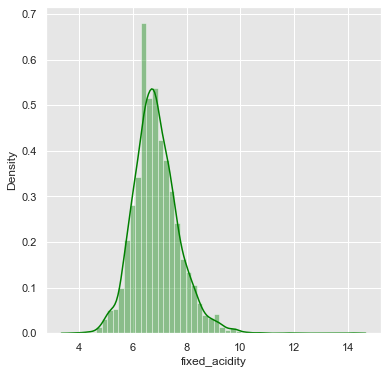

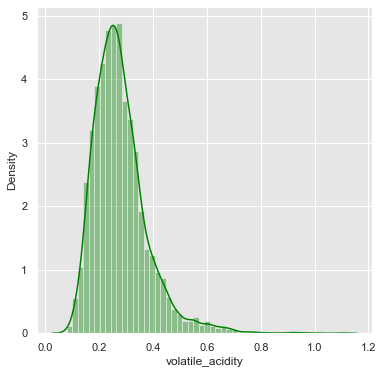

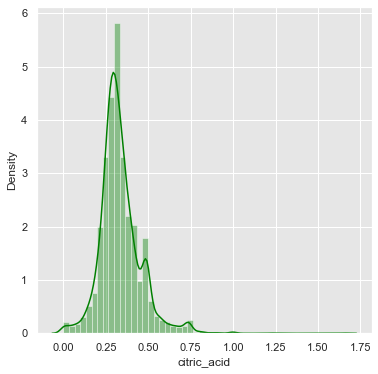

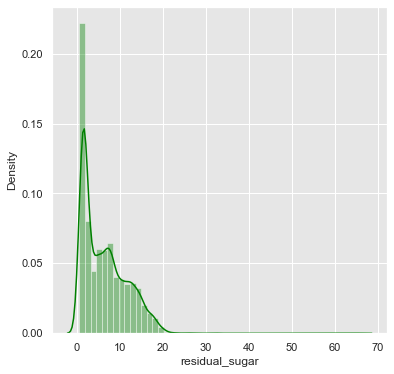

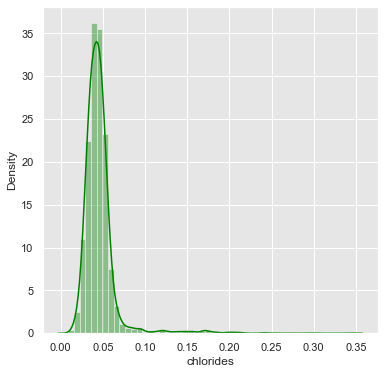

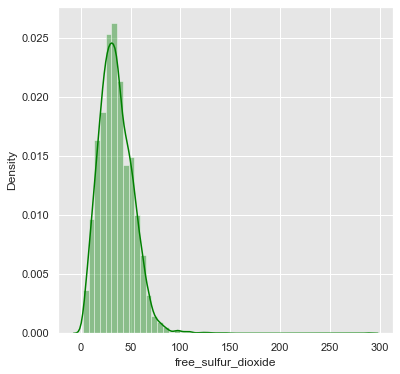

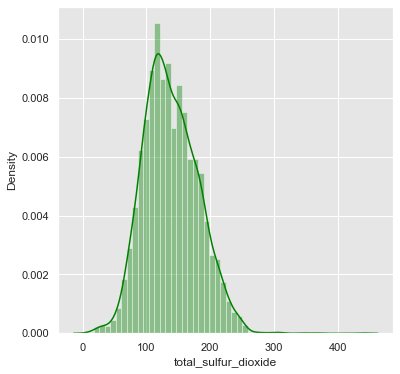

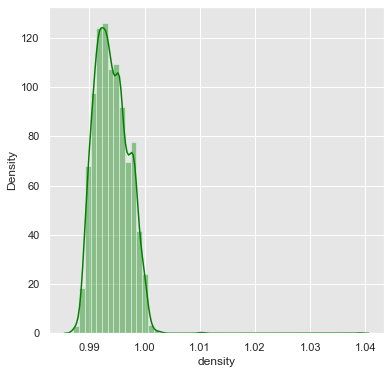

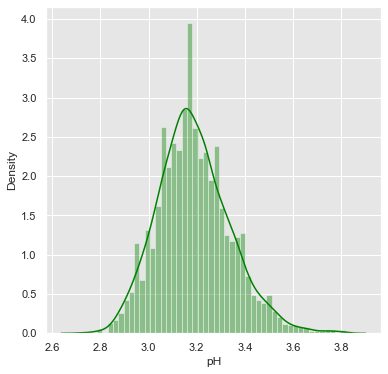

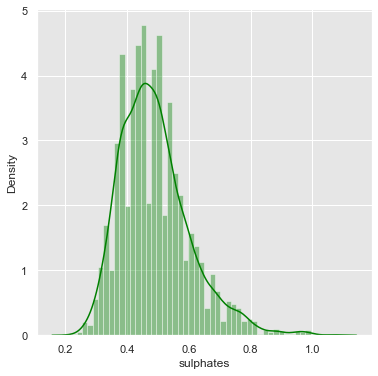

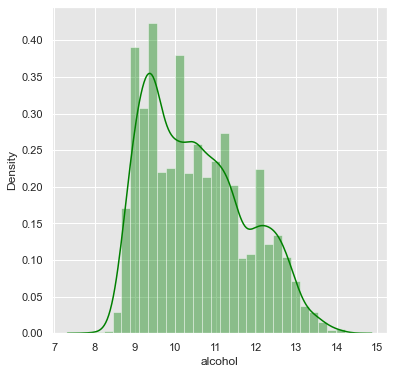

In [5]:
#Generate plots to study the data distribution
attr_list = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol']

y = wine_data['quality'].tolist()

for i in attr_list:
    x = wine_data[i].tolist()
    x = pd.Series(x, name=i)
    plt.figure(figsize=(6, 6))
    sn.set_style("darkgrid", {"axes.facecolor": ".9"})
    sn.set_context("notebook")
    ax = sn.distplot(x, color = 'green')

From the above plots we can see the distribution of data and infer that:
1. The amount of chlorides present in the wine samples is always less than 10%
2. The density of wine is always less than 1.
3. The amount of alcohol varies from 8 to 14.
4. The pH levels are between 2-4.

### Visualize the correlation matrix

Let us try and examine the correlation between variables and quality of the wine

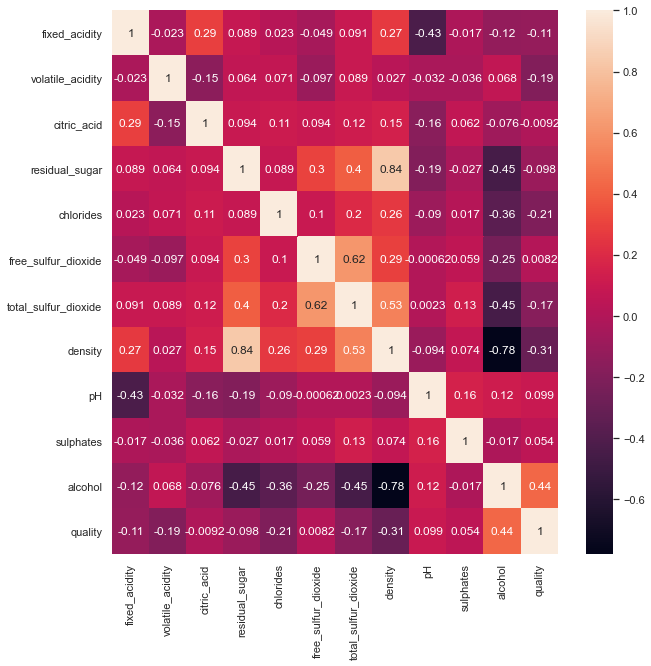

In [6]:
#Create a correlation matrix
corrMatrix = wine_data.corr()


#visualize as correlation matrix heatmap
fig= plt.figure(figsize=(10,10))
sn.heatmap(corrMatrix, annot=True)
plt.show()

### Analysis of the Correlation Matrix

From the correlation values we can infer that:
1. The variable alcohol has moderate positive correlation to the wine quality. 
2. The variable density has moderate negative correlation to the wine quality.
3. There is a high positive correletion between density and residual sugar. Hence we can drop residual sugar from the attributes used for regression modelling.
4. Total sulphur dioxide and free sulphur dioxide have a positive correlation
5. The variables citric acid and free sulphur dioxide have a very low correlation with the wine quality and hence we can drop these variables from our prediction model.


### Linear Regression

We will be using the the multiple linear regession which is a statistical technique that uses multiple variables to predict the output (in this case the quality of wine).

### Learning the regression model

In [7]:
attr_list = ['fixed_acidity','volatile_acidity','chlorides','total_sulfur_dioxide','density','pH','sulphates','alcohol']
#attr_list = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol']


In the next step we will learn multiple regression models and make a choice for the most relevant attributes

In [8]:
attr_new = []
Y = wine_data['quality']
accuracy = []
relv_attr = []

for i in range(len(attr_list)):
    attr_new.append(attr_list[i])
    X = wine_data[attr_new]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    reg = LinearRegression().fit(X_train, Y_train)
    Y_pred = reg.predict(X_test)
    Y_pred_round = [round(num) for num in Y_pred]
    score = accuracy_score(Y_test, Y_pred_round)
    accuracy.append(score)
    if(round(score,2) > round(accuracy[i-1],2)) or i == 0:
        relv_attr.append(attr_list[i])
        #print(attr_new)
        #print(round(score,2))
    
    

In [9]:
for i in range(len(relv_attr)):
    print(relv_attr[i]) 

fixed_acidity
total_sulfur_dioxide
density
pH
alcohol


### The Best regression model

In [10]:
X = wine_data[relv_attr]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
reg = LinearRegression().fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
Y_pred_round = [round(num) for num in Y_pred]
score = f1_score(Y_test, Y_pred_round, average='weighted')
print("The f1_score score: " +str(round(score,2)))

The f1_score score: 0.46


### The baseline (Linear Regression) model's prediction score is 46%